# KC HOUSE DATA 

<B>Questions:</B>
<br><li>does having a waterfront contribute to higher price?
<br><li>does grade have an effect on the housing price?
<br><li>do the mean prices vary with grades?
<br><li>does condition of the house have an effect on price?
<br><li>what factors influence the price?

# CHECKING THE DATASET

In [58]:
#importing necessary packages
import numpy as np
from scipy import stats 
import math
import pylab as py 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from sklearn import preprocessing
from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
#surpresses scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [5]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


# CLEANING THE DATASET

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [7]:
df.drop(['date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [8]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.00,3,1.00,1180,5650,1.00,nan,3,7,1955
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,1951
2,5631500400,180000.00,2,1.00,770,10000,1.00,0.00,3,6,1933
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1965
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1987


In [9]:
df.shape

(21597, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
id             21597 non-null int64
price          21597 non-null float64
bedrooms       21597 non-null int64
bathrooms      21597 non-null float64
sqft_living    21597 non-null int64
sqft_lot       21597 non-null int64
floors         21597 non-null float64
waterfront     19221 non-null float64
condition      21597 non-null int64
grade          21597 non-null int64
yr_built       21597 non-null int64
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1971.00
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.65,1.17,29.38
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,1900.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1951.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1975.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,1997.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,2015.00


<B>FINDING NAN VALUES

In [12]:
#detecting nan values in dataframe
df.isna().values.any()

True

In [13]:
#locating where the nan values exist and the amount of nan values for each columns
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

<b>DEALING WITH NAN VALUES

In [14]:
#waterfront has 2376 nan values
#checking all unique values for waterfront
#according to the column descriptions for this data set a house can have a waterfront
df.waterfront.unique()

array([nan,  0.,  1.])

In [15]:
#from checking the unique values in waterfront it indicates that value 1 shows houses to have a waterfront or no waterfront with value 0
#seeing that there are nan values we can make the assumption that  there is no waterfront and therefore we can replace these nan values with 0
#indicating that there is no waterfront

In [16]:
df["waterfront"] = df["waterfront"].fillna(0.0)

In [17]:
df.waterfront.unique()

array([0., 1.])

<B>DEALING WITH OULIERS AND EXTREME VALUES

In [18]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1971.00
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.65,1.17,29.38
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,1900.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1951.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1975.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,1997.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,2015.00


In [19]:
df[df['sqft_lot']==1651359.00]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1717,1020069017,700000.00,4,1.00,1300,1651359,1.00,0.00,4,6,1920


In [20]:
#from this table it can be seen that the max value for bedrooms is 33 

In [21]:
#checking the row that has 33 bedrooms
df[df['bedrooms']==33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15856,2402100895,640000.00,33,1.75,1620,6000,1.00,0.00,5,7,1947


In [22]:
df[df['grade']==10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
66,3394100030,975000.00,4,2.50,2720,11049,2.00,0.00,3,10,1989
75,3276920270,832500.00,4,4.00,3430,35102,2.00,0.00,4,10,1986
79,1531000030,720000.00,4,2.50,3450,39683,2.00,0.00,3,10,2002
91,5036300431,1100000.00,5,2.75,3520,6353,2.00,0.00,4,10,2001
108,1853000400,680000.00,4,2.50,3140,28037,2.00,0.00,4,10,1991
...,...,...,...,...,...,...,...,...,...,...,...
21552,524059330,1700000.00,4,3.50,3830,8963,2.00,0.00,3,10,2014
21557,8562790760,785000.00,4,3.50,3070,4684,2.00,0.00,3,10,2009
21560,9253900271,3570000.00,5,4.50,4850,10584,2.00,1.00,3,10,2007
21577,8672200110,1090000.00,5,3.75,4170,8142,2.00,0.00,3,10,2006


<B>CHECKING FOR DUPLICATES

In [23]:
#checking if there are any duplicate values
df.duplicated().any()

True

In [24]:
df.duplicated().sum()

3

In [25]:
df[df.duplicated() == True]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3947,1825069031,550000.00,4,1.75,2410,8447,2.00,0.00,4,8,1936
14969,6308000010,585000.00,3,2.50,2290,5089,2.00,0.00,3,9,2001
20038,8648900110,555000.00,3,2.50,1940,3211,2.00,0.00,3,8,2009


In [26]:
df.id.duplicated().sum()

177

In [27]:
df[df['id'].duplicated() == True].sort_values('id')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2495,1000102,300000.00,6,3.00,2400,9373,2.00,0.00,3,7,1991
16801,7200179,175000.00,2,1.00,840,12750,1.00,0.00,3,6,1925
11422,109200390,250000.00,3,1.75,1480,3900,1.00,0.00,4,7,1980
12406,123039336,244900.00,1,1.00,620,8261,1.00,0.00,3,5,1939
7786,251300110,358000.00,3,2.25,2510,12013,2.00,0.00,3,8,1988
...,...,...,...,...,...,...,...,...,...,...,...
2492,9407110710,322000.00,3,1.75,1510,8400,1.00,0.00,2,7,1979
4918,9809000020,1940000.00,5,2.25,3120,16672,2.00,0.00,4,9,1969
6340,9828200460,430000.00,2,1.00,700,4800,1.00,0.00,3,7,1922
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [28]:
df[df['id'] == 9834200305]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15185,9834200305,350000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [29]:
#removing all the duplicate ids and keeping the second one
#duplicate ids indicate that the house has been sold more than once

In [30]:
df.drop_duplicates(subset='id', keep="last", inplace=True)

In [31]:
#
df.duplicated(subset = ['id']).sum()

0

In [32]:
df[df['id'] == 9834200305]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [33]:
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [34]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

# EXPLORATORY DATA ANALYSIS (EDA)

In [35]:
#checking if waterfront is a categorial variable

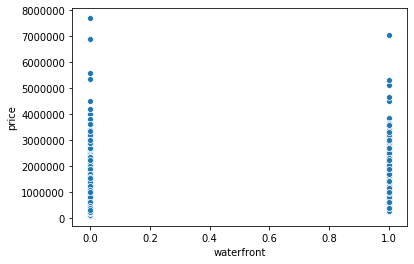

In [36]:
#graphing scatterplot
sns.scatterplot('waterfront','price',data=df)

In [37]:
#verticle lines indicate that the variables are categorical variables and are discrete

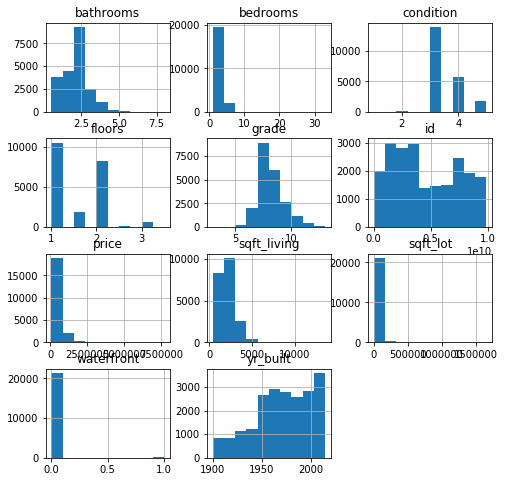

In [38]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax);

Text(0.5, 1.0, 'Average Price of houses based on if they have waterfronts')

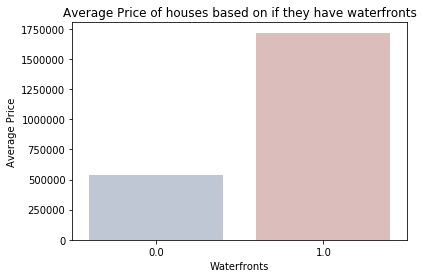

In [71]:
#graphing the average price of avocados based on type
type_list=list(df.waterfront.unique())
average_price2=[]

for i in type_list:
    x=df[df.waterfront==i]
    average_price2.append(sum(x.price)/len(x))
df2=pd.DataFrame({'type_list':type_list,'average_price':average_price2})

plt.figure()
ax=sns.barplot(x=df2.type_list,y=df2.average_price,palette='vlag')
plt.xlabel('Waterfronts')
plt.ylabel('Average Price')
plt.title('Average Price of houses based on if they have waterfronts')

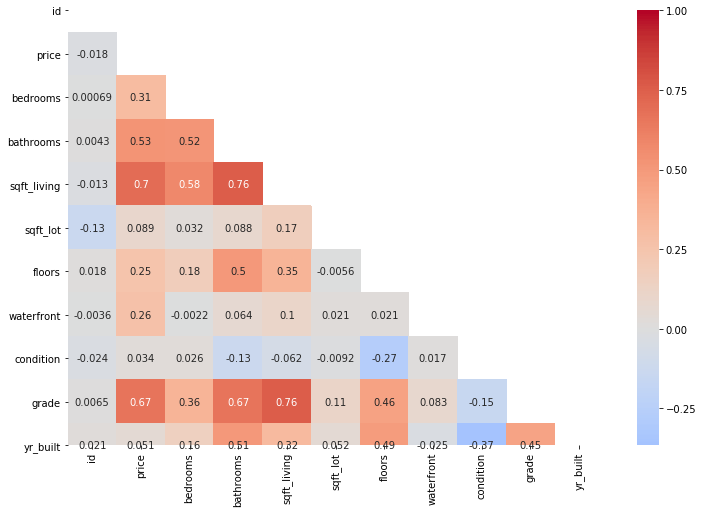

In [42]:
#correlation heatmap
plt.figure(figsize=(12,8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

# TRAIN/TEST SPLIT

In [43]:
# Pre-processing
X = df.drop('price',axis=1)

y = df['price']
y = pd.DataFrame(y)

In [44]:
# check X and Y shape
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (21420, 10)
y Shape: (21420, 1)


In [45]:
base_reg = LinearRegression().fit(X, y)
base_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
X.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,1.00,0.00,0.00,-0.01,-0.13,0.02,-0.00,-0.02,0.01,0.02
bedrooms,0.00,1.00,0.52,0.58,0.03,0.18,-0.00,0.03,0.36,0.16
bathrooms,0.00,0.52,1.00,0.76,0.09,0.50,0.06,-0.13,0.67,0.51
sqft_living,-0.01,0.58,0.76,1.00,0.17,0.35,0.10,-0.06,0.76,0.32
sqft_lot,-0.13,0.03,0.09,0.17,1.00,-0.01,0.02,-0.01,0.11,0.05
floors,0.02,0.18,0.50,0.35,-0.01,1.00,0.02,-0.27,0.46,0.49
waterfront,-0.00,-0.00,0.06,0.10,0.02,0.02,1.00,0.02,0.08,-0.02
condition,-0.02,0.03,-0.13,-0.06,-0.01,-0.27,0.02,1.00,-0.15,-0.37
grade,0.01,0.36,0.67,0.76,0.11,0.46,0.08,-0.15,1.00,0.45
yr_built,0.02,0.16,0.51,0.32,0.05,0.49,-0.02,-0.37,0.45,1.00


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.80)
# Scaling the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# check the shape
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (17136, 10)
X_test Shape: (4284, 10)
y_train Shape: (17136, 1)
y_test Shape: (4284, 1)


In [54]:
lin_reg = LinearRegression()

In [55]:
lin_reg.fit(X_train,y_train);

In [56]:
lin_reg.score(X_train,y_train)

0.644401526240164

In [59]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(2)

# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train)

# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test)

# Get predeicted values for polynomial training data to compute MSE
y_trainpred = reg_poly.predict(X_poly_train)

# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)

# Evaluate model performance on test data
print("degree %d" % 2, r2_score(y_test, y_pred))

# Transform the full data
X_poly = poly.transform(X)

# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

degree 2 0.6472223923949851


In [60]:
# The coefficients
print('Coefficients: \n', reg_poly.coef_)
train_mse = mean_squared_error(y_train, y_trainpred)
print('Train Mean Squarred Error:', train_mse)
print('r_squared_score:',r2_score(y_train, y_trainpred))

Coefficients: 
 [[ 2.55658726e-04  2.91491881e-04 -7.77697958e-07  1.01770234e-06
   1.52059518e-04 -4.79974206e-03 -7.93232571e-05 -9.31168826e-04
  -8.18133738e-04 -1.61958066e-03 -3.53451406e-03  1.42952056e-16
  -3.91564283e-06  8.38771643e-06 -2.06083944e-08 -1.39677687e-10
   3.24015205e-06  1.08036129e-04  4.17180086e-06  1.90746766e-05
  -2.13702364e-07  2.02386112e-06 -3.72293097e-06 -1.60706453e-03
  -2.72255937e-01 -6.82791471e-06  2.82411782e-07  3.15556813e-06
  -1.88103024e-07 -3.84490527e-03  9.73140388e-06  3.40141618e-03
   5.38127224e-01  3.66564544e-06  1.54004021e-07  3.43546992e-06
   1.82373142e-05  6.49518373e-04  4.50035657e-02 -1.56070326e-03
   2.19172573e-03  2.07848413e-04  2.17709650e-03  1.01771735e-02
   3.75906666e-02  8.64261829e-07  1.11756939e-01  2.10935102e-03
   6.32769182e-02  7.06913140e-01 -1.41751915e-03  7.27344957e-06
   1.84915326e-07  6.03596093e-06  2.27451168e-05  1.84809224e-03
   6.25173334e-08  1.39962324e-07  3.84175405e-07  1.2380963

In [61]:
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
13634,8029550180,4,2.50,2240,4616,2.00,0.00,3,7,2001
13631,5035300871,2,2.25,2470,7658,1.00,0.00,4,8,1954
5717,1526079026,5,3.50,3530,218472,2.00,0.00,3,7,1999
15431,4060000020,4,1.50,1580,10230,1.00,0.00,3,6,1945
17294,6072400470,4,2.50,2070,10244,1.00,0.00,3,8,1969
...,...,...,...,...,...,...,...,...,...,...
11383,8732190200,4,2.25,2490,7233,1.00,0.00,3,8,1978
12069,5288200260,2,1.75,2470,4600,1.00,0.00,4,7,1916
5432,6381500635,3,1.00,1260,6826,1.00,0.00,3,6,1944
868,3330500875,2,1.00,1320,3090,1.00,0.00,4,7,1908


# LINEAR REGRESSION

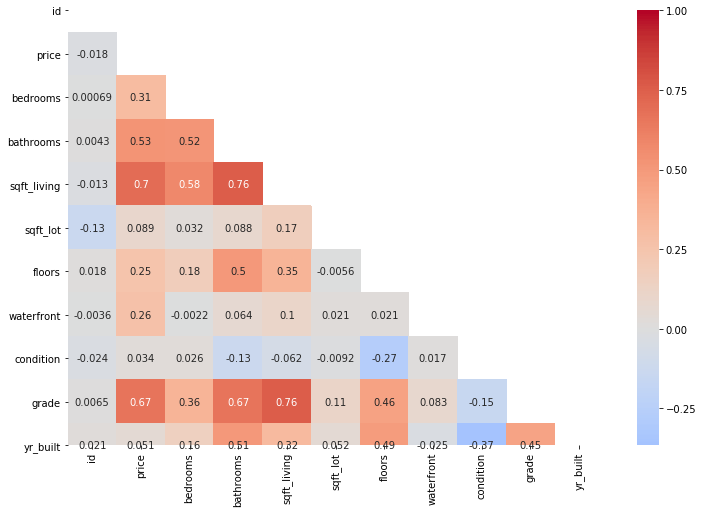

In [65]:
#correlation heatmap
plt.figure(figsize=(12,8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

In [66]:
#creating a model based on the top three correlating variables

In [67]:
def run_lin_regr(dependent_variable, independent_variables, data):
    y = data[dependent_variable]
    X = data[independent_variables].assign(constant=1)
    res = sm.OLS(y, X).fit()
    print(res.summary())

In [64]:
run_lin_regr('price',['id','grade','condition','floors','sqft_living','sqft_lot','waterfront','bathrooms','bedrooms'], df)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     3429.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:56:30   Log-Likelihood:            -2.9532e+05
No. Observations:               21420   AIC:                         5.907e+05
Df Residuals:                   21410   BIC:                         5.907e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
id          -1.909e-06   5.64e-07     -3.384      

In [68]:
X = sm.add_constant(X)
model = sm.OLS(y, X)

In [69]:
results = model.fit()

In [70]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3897.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:57:17   Log-Likelihood:            -2.9378e+05
No. Observations:               21420   AIC:                         5.876e+05
Df Residuals:                   21409   BIC:                         5.877e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.737e+06    1.3e+05     51.661      0.000    6.48e+06    6.99e+06
id          -1.541e-06   5.25e-07     -2.935      0.003   -2.57e-06   -5.12e-07
bedrooms    -4.263e+04   2064.338    -20.652      0.000   -4.67e+04   -3.86e+04
bathrooms    5.146e+04   3472.702     14.819      0.000    4.47e+04    5.83e+04
sqft_living   176.9389      3.315     53.376      0.000     170.441     183.436
sqft_lot       -0.2587      0.037     -6.958      0.000      -0.332      -0.186
floors       2.062e+04   3473.913      5.937      0.000    1.38e+04    2.74e+04
waterfront   7.544e+05   1.84e+04     41.047      0.000    7.18e+05     7.9e+05
condition    1.841e+04   2507.048      7.344      0.000    1.35e+04    2.33e+04
grade          1.3e+05   2167.070     60.002      0.000    1.26e+05    1.34e+05
yr_built    -3862.5958     67.038    -57.618      0.000   -3993.995   -3731.197
==============================================================================
Omnibus:                    15781.127   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1015837.859
Skew:                           2.951   Prob(JB):                         0.00
Kurtosis:                      36.217   Cond. No.                     4.72e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lin_reg.score(X_test,y_test)